<a href="https://colab.research.google.com/github/Akshitwadhwa/Stock-modelling/blob/main/prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
# Fetch TCS stock data
tcs = yf.Ticker("TCS.NS")

In [ ]:
# Get general information about the stock
print(tcs.info)

{'address1': 'TCS House', 'address2': 'Raveline Street Corner of Hazarimal Somani Marg Near Sterling Cinema, Fort', 'city': 'Mumbai', 'zip': '400 001', 'country': 'India', 'phone': '91 22 6778 9999', 'fax': '91 22 6778 9000', 'website': 'https://www.tcs.com', 'industry': 'Information Technology Services', 'industryKey': 'information-technology-services', 'industryDisp': 'Information Technology Services', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Tata Consultancy Services Limited provides information technology (IT) and IT enabled services in the Americas, Europe, India, and internationally. It operates through Banking, Financial Services and Insurance; Manufacturing; Consumer Business; Communication, Media and Technology; Life Sciences and Healthcare; and Others segments. The company provides TCS ADD, a suite of technology platforms for clinical research and drug development; TCS BaNCS, a financial services platform; TCS BFSI

In [ ]:
# Fetch historical data for the last month
last_month_tcs= tcs.history(start="2025-02-01", end="2025-03-01")
last_month_tcs.head(5)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-01 00:00:00+05:30,4113.000000,4135.899902,4056.000000,4073.149902,437172,0.0,0.0
2025-02-03 00:00:00+05:30,4030.899902,4077.000000,3998.699951,4068.649902,1265713,0.0,0.0
2025-02-04 00:00:00+05:30,4083.699951,4118.850098,4066.050049,4107.049805,2547132,0.0,0.0
2025-02-05 00:00:00+05:30,4150.000000,4150.000000,4076.000000,4091.100098,1693912,0.0,0.0
2025-02-06 00:00:00+05:30,4105.399902,4139.500000,4051.550049,4082.750000,2284536,0.0,0.0


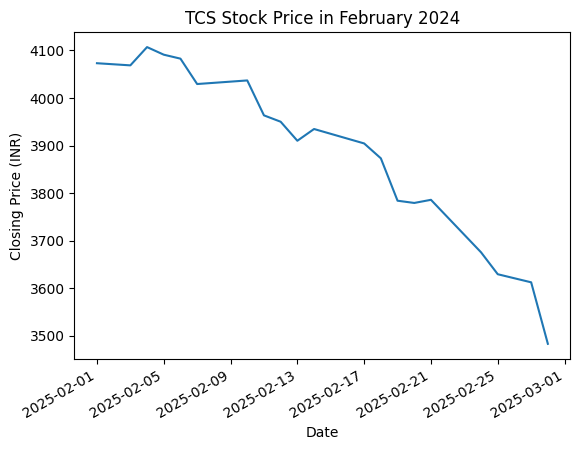

In [ ]:

# Plot the closing price for the last month
last_month_tcs['Close'].plot(title="TCS Stock Price in February 2024")
plt.xlabel("Date")
plt.ylabel("Closing Price (INR)")
plt.show()


In [ ]:

# Fetch stock data for the first 3 months of 2025
stock = yf.download("TCS.NS", start="2025-01-01", end="2025-03-01")


[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True


In [ ]:

# Fetch the last 2 months of historical data
last2months = tcs.history(period="2mo")
print(last2months.head(5))


                                  Open         High          Low        Close  \
Date                                                                            
2025-01-24 00:00:00+05:30  4104.000000  4178.000000  4104.000000  4152.350098   
2025-01-27 00:00:00+05:30  4102.000000  4156.350098  4041.050049  4065.149902   
2025-01-28 00:00:00+05:30  4070.800049  4102.000000  4028.300049  4040.300049   
2025-01-29 00:00:00+05:30  4054.000000  4107.850098  4054.000000  4099.799805   
2025-01-30 00:00:00+05:30  4099.899902  4129.899902  4058.500000  4100.049805   

                            Volume  Dividends  Stock Splits  
Date                                                         
2025-01-24 00:00:00+05:30  1910099        0.0           0.0  
2025-01-27 00:00:00+05:30  1551782        0.0           0.0  
2025-01-28 00:00:00+05:30  2468272        0.0           0.0  
2025-01-29 00:00:00+05:30  1217089        0.0           0.0  
2025-01-30 00:00:00+05:30  1531251        0.0           0.0 

In [ ]:

# Define feature columns and target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'


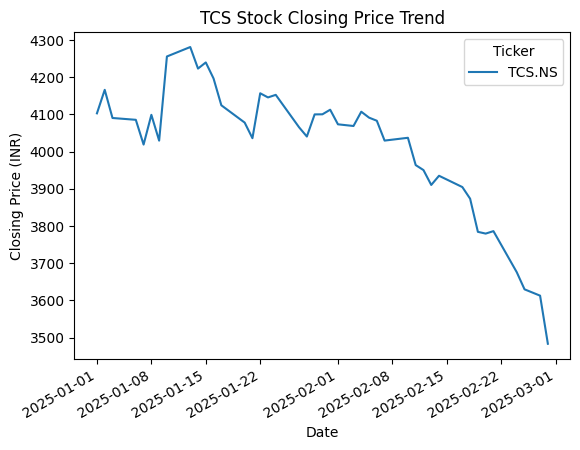

In [ ]:

# Plot closing prices
stock['Close'].plot(title="TCS Stock Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price (INR)")
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 36.22


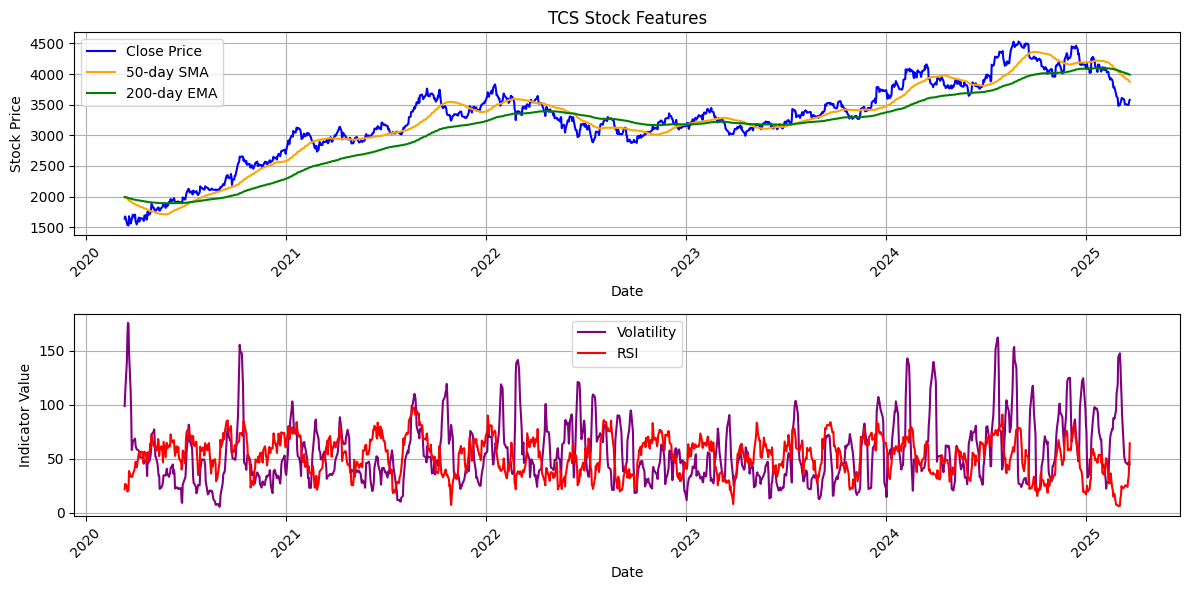

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def compute_rsi(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Fetch TCS stock data
stock = yf.download("TCS.NS", start="2020-01-01", end="2025-03-23")

# Feature Engineering
stock['Daily Return'] = stock['Close'].pct_change()  # Daily Return
stock['SMA_50'] = stock['Close'].rolling(window=50).mean()  # 50-day moving average
stock['EMA_200'] = stock['Close'].ewm(span=200, adjust=False).mean()  # 200-day Exponential Moving Average
stock['Volatility'] = stock['Close'].rolling(window=10).std()  # 10-day Rolling Volatility
stock['RSI'] = compute_rsi(stock['Close'])  # Relative Strength Index

# Drop NaN values created by rolling calculations
stock.dropna(inplace=True)

# Define Features and Target
features = ['Open', 'High', 'Low', 'SMA_50', 'EMA_200', 'Volatility', 'RSI', 'Daily Return']
target = 'Close'

# Prepare data for ML model
X = stock[features]
y = stock[target].shift(-1)  # Predict next day's closing price

# Drop the last row due to shift operation
X = X[:-1]
y = y[:-1]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Plot All Features
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(stock.index, stock['Close'], label="Close Price", color='blue')
plt.plot(stock.index, stock['SMA_50'], label="50-day SMA", color='orange')
plt.plot(stock.index, stock['EMA_200'], label="200-day EMA", color='green')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.title("TCS Stock Features")
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(stock.index, stock['Volatility'], label="Volatility", color='purple')
plt.plot(stock.index, stock['RSI'], label="RSI", color='red')
plt.xlabel("Date")
plt.ylabel("Indicator Value")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def compute_rsi(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# List of stocks to analyze
stocks = ["TCS.NS", "INFY.NS", "RELIANCE.NS", "ICICIBANK.NS",
          "SBIN.NS", "AXISBANK.NS", "BAJFINANCE.NS", "LT.NS", "MARUTI.NS", "ITC.NS"]

results = {}

for stock_symbol in stocks:
    # Fetch stock data
    stock = yf.download(stock_symbol, start="2020-01-01", end="2025-03-23")

    # Feature Engineering
    stock['Daily Return'] = stock['Close'].pct_change()
    stock['SMA_50'] = stock['Close'].rolling(window=50).mean()
    stock['EMA_200'] = stock['Close'].ewm(span=200, adjust=False).mean()
    stock['Volatility'] = stock['Close'].rolling(window=10).std()
    stock['RSI'] = compute_rsi(stock['Close'])

    # Drop NaN values
    stock.dropna(inplace=True)

    # Define Features and Target
    features = ['Open', 'High', 'Low', 'SMA_50', 'EMA_200', 'Volatility', 'RSI', 'Daily Return']
    target = 'Close'

    X = stock[features]
    y = stock[target].shift(-1)

    # Drop last row due to shift operation
    X = X[:-1]
    y = y[:-1]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    results[stock_symbol] = mae

    # Print dataset with calculated parameters
    print(f"Dataset for {stock_symbol}:")
    print(stock.head())
    print(f"Mean Absolute Error for {stock_symbol}: {mae:.2f}\n")

# Identify the best 5 stocks based on lowest MAE
best_stocks = sorted(results, key=results.get)[:5]
print("Top 5 Stocks for Further Analysis:")
print(best_stocks)

# Compare portfolio behavior during major market crashes
# (You would need historical crash periods and apply analysis on those periods)

# Compare portfolio performance across three different markets (Indices)
indices = ["^NSEI", "^BSESN", "^DJI"]
index_data = {}

for index in indices:
    index_data[index] = yf.download(index, start="2020-01-01", end="2025-03-23")
    print(f"Index Data for {index}:")
    print(index_data[index].head())

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Dataset for TCS.NS:
Price             Close         High          Low         Open   Volume  \
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS   
Date                                                                      
2020-03-12  1641.566406  1770.073968  1630.899958  1765.992870  8728786   
2020-03-13  1675.374512  1688.081453  1396.887448  1565.556443  8029720   
2020-03-16  1573.440186  1708.718545  1554.379662  1627.792670  7844271   
2020-03-17  1537.823730  1605.532495  1505.499774  1604.604978  5713248   
2020-03-18  1534.484619  1589.347289  1509.766261  1555.261029  7258778   

Price      Daily Return       SMA_50      EMA_200  Volatility        RSI  
Ticker                                                                    
Date                                                                      
2020-03-12    -0.094104  1986.364524  1995.209592   98.624883  21.863014  
2020-03-13     0.020595  1979.753384  1992.027153  111.041929  26.781911  
2020

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Dataset for INFY.NS:
Price            Close        High         Low        Open    Volume  \
Ticker         INFY.NS     INFY.NS     INFY.NS     INFY.NS   INFY.NS   
Date                                                                   
2020-03-12  561.612793  596.135241  558.320692  594.355733  13965574   
2020-03-13  571.533569  593.466031  507.159877  526.734469  16903113   
2020-03-16  518.860107  553.560516  516.057360  553.427031  19140152   
2020-03-17  493.769165  526.734551  489.364870  523.264488  16059887   
2020-03-18  475.395630  514.277897  469.790190  505.380355  15390183   

Price      Daily Return      SMA_50     EMA_200 Volatility        RSI  
Ticker                                                                 
Date                                                                   
2020-03-12    -0.079884  678.322786  664.362428  38.079394  12.956879  
2020-03-13     0.017665  676.641151  663.438758  41.171495  17.255981  
2020-03-16    -0.092162  673.944305  662.0

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Dataset for RELIANCE.NS:
Price            Close        High         Low        Open      Volume  \
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS   
Date                                                                     
2020-03-12  474.196838  491.148365  467.817712  484.010902    55970485   
2020-03-13  493.066589  508.545992  420.398057  445.200805    73297403   
2020-03-16  453.096649  481.646590  448.323441  473.103915    38482258   
2020-03-17  449.661774  472.858604  447.520529  467.170902    45445979   
2020-03-18  432.041077  462.107751  428.695385  457.379151    44730415   

Price      Daily Return      SMA_50     EMA_200 Volatility        RSI  
Ticker                                                                 
Date                                                                   
2020-03-12    -0.078497  643.995909  659.556643  49.563665  11.535806  
2020-03-13     0.039793  640.388801  657.900026  49.916169  18.143806  
2020-03-16    -0.08106

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Dataset for ICICIBANK.NS:
Price             Close         High          Low         Open       Volume  \
Ticker     ICICIBANK.NS ICICIBANK.NS ICICIBANK.NS ICICIBANK.NS ICICIBANK.NS   
Date                                                                          
2020-03-12   411.458221   431.081408   402.129972   423.396461     50757033   
2020-03-13   432.289734   449.254580   382.023487   387.630095     67104335   
2020-03-16   389.466736   410.056581   384.198464   410.056581     34833637   
2020-03-17   355.005371   394.831717   351.863731   393.430050     47232699   
2020-03-18   343.212158   362.980340   330.887260   356.793731     61202289   

Price      Daily Return      SMA_50     EMA_200 Volatility        RSI  
Ticker                                                                 
Date                                                                   
2020-03-12    -0.085901  507.932700  513.795489  28.580840  16.256016  
2020-03-13     0.050628  506.201414  512.984487  29.4

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Dataset for SBIN.NS:
Price            Close        High         Low        Open     Volume  \
Ticker         SBIN.NS     SBIN.NS     SBIN.NS     SBIN.NS    SBIN.NS   
Date                                                                    
2020-03-12  200.108566  218.274572  196.343589  218.274572   99767083   
2020-03-13  227.781143  234.181608  173.800771  188.248879  155701316   
2020-03-16  210.226944  217.803950  207.638522  214.509595   75583409   
2020-03-17  202.508713  216.392067  199.590864  213.850710   65403057   
2020-03-18  202.555786  210.038676  188.343005  208.015006  101356399   

Price      Daily Return      SMA_50     EMA_200 Volatility        RSI  
Ticker                                                                 
Date                                                                   
2020-03-12    -0.132599  293.715303  305.663366  29.628010  12.625770  
2020-03-13     0.138288  291.974942  304.888419  26.779673  24.240612  
2020-03-16    -0.077066  289.79219

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Dataset for AXISBANK.NS:
Price            Close        High         Low        Open      Volume  \
Ticker     AXISBANK.NS AXISBANK.NS AXISBANK.NS AXISBANK.NS AXISBANK.NS   
Date                                                                     
2020-03-12  540.893311  591.423150  525.858841  589.431827    29369378   
2020-03-13  566.332520  583.109460  449.143123  514.707470    25599305   
2020-03-16  506.393616  542.635700  500.170729  539.997172    21542970   
2020-03-17  486.231476  528.995135  475.378768  512.915232    20590414   
2020-03-18  471.396118  503.854670  390.399020  487.874310    36240904   

Price      Daily Return      SMA_50     EMA_200 Volatility        RSI  
Ticker                                                                 
Date                                                                   
2020-03-12    -0.122871  717.225979  732.985694  53.402476   7.186136  
2020-03-13     0.047032  713.643590  731.327453  53.458432  15.357292  
2020-03-16    -0.10583

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Dataset for BAJFINANCE.NS:
Price              Close          High           Low          Open  \
Ticker     BAJFINANCE.NS BAJFINANCE.NS BAJFINANCE.NS BAJFINANCE.NS   
Date                                                                 
2020-03-12   3680.604492   3814.252762   3575.883666   3804.446013   
2020-03-13   3895.663818   3985.304792   3233.828238   3390.490536   
2020-03-16   3619.397949   3778.277866   3548.187791   3778.277866   
2020-03-17   3395.270996   3680.949262   3353.037607   3648.818593   
2020-03-18   3017.290283   3479.195244   2975.451043   3439.770935   

Price             Volume Daily Return       SMA_50      EMA_200  Volatility  \
Ticker     BAJFINANCE.NS                                                      
Date                                                                          
2020-03-12       5272619    -0.073512  4313.172202  4226.905126  277.440709   
2020-03-13       4849917     0.058430  4307.868701  4223.609192  235.142092   
2020-03-16       

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Dataset for LT.NS:
Price            Close        High         Low        Open   Volume  \
Ticker           LT.NS       LT.NS       LT.NS       LT.NS    LT.NS   
Date                                                                  
2020-03-12  933.872864  983.021706  922.435425  982.975728  9200130   
2020-03-13  965.934326  974.202346  817.615284  872.735415  8117911   
2020-03-16  889.914490  957.252902  883.667553  931.759843  6671806   
2020-03-17  878.936279  923.262044  863.686401  892.945977  4720207   
2020-03-18  830.981873  895.472435  826.801941  889.271421  5586097   

Price      Daily Return       SMA_50      EMA_200 Volatility        RSI  
Ticker                                                                   
Date                                                                     
2020-03-12    -0.089887  1173.375225  1188.433703  52.326431  11.864659  
2020-03-13     0.034332  1168.625710  1186.219779  55.238263  19.955421  
2020-03-16    -0.078701  1161.706298  1183

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Dataset for MARUTI.NS:
Price             Close         High          Low         Open    Volume  \
Ticker        MARUTI.NS    MARUTI.NS    MARUTI.NS    MARUTI.NS MARUTI.NS   
Date                                                                       
2020-03-12  5418.408203  5702.763765  5334.296830  5702.763765   1345964   
2020-03-13  5606.074707  5822.017850  4611.765762  5113.121232   1480205   
2020-03-16  5261.995605  5461.471831  5184.941612  5414.039311    933412   
2020-03-17  5380.769043  5518.073970  5282.879084  5282.879084   1238640   
2020-03-18  5139.477051  5462.239559  5100.973966  5445.148644    973395   

Price      Daily Return       SMA_50      EMA_200  Volatility        RSI  
Ticker                                                                    
Date                                                                      
2020-03-12    -0.081862  6624.259473  6843.943901  220.178075  15.013382  
2020-03-13     0.034635  6595.970820  6831.626795  250.857300  24.26

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Dataset for ITC.NS:
Price            Close        High         Low        Open    Volume  \
Ticker          ITC.NS      ITC.NS      ITC.NS      ITC.NS    ITC.NS   
Date                                                                   
2020-03-12  124.328972  134.982313  120.139453  134.862618  52039692   
2020-03-13  129.476105  130.872611  107.411307  119.700559  61590681   
2020-03-16  117.506027  126.164371  115.910020  126.084566  33254907   
2020-03-17  119.022255  124.328987  116.548451  118.104555  47657482   
2020-03-18  120.259148  123.411260  117.585843  121.376360  50243331   

Price      Daily Return      SMA_50     EMA_200 Volatility        RSI  
Ticker                                                                 
Date                                                                   
2020-03-12    -0.113009  173.406196  182.549505  10.392551   2.429826  
2020-03-13     0.041399  172.195625  182.021411  11.169812  11.824326  
2020-03-16    -0.092450  170.717722  181.37


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Index Data for ^BSESN:
Price              Close          High           Low          Open Volume
Ticker            ^BSESN        ^BSESN        ^BSESN        ^BSESN ^BSESN
Date                                                                     
2020-01-02  41626.640625  41649.289062  41328.449219  41340.269531   5300
2020-01-03  41464.609375  41636.179688  41348.679688  41634.511719   8900
2020-01-06  40676.628906  41378.339844  40613.960938  41378.339844   8700
2020-01-07  40869.468750  41230.140625  40727.371094  40983.039062  11900
2020-01-08  40817.738281  40866.359375  40476.550781  40574.828125  18200
Index Data for ^DJI:
Price              Close          High           Low          Open     Volume
Ticker              ^DJI          ^DJI          ^DJI          ^DJI       ^DJI
Date                                                                         
2020-01-02  28868.800781  28872.800781  28627.769531  28638.970703  251820000
2020-01-03  28634.880859  28716.310547  28500.359375

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def compute_rsi(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# List of stocks to analyze
stocks = ["TCS.NS", "INFY.NS", "RELIANCE.NS", "ICICIBANK.NS",
          "SBIN.NS", "AXISBANK.NS", "BAJFINANCE.NS", "LT.NS", "MARUTI.NS", "ITC.NS"]

results = {}
stock_data = {}

for stock_symbol in stocks:
    # Fetch stock data
    stock = yf.download(stock_symbol, start="2020-01-01", end="2025-03-23")

    # Feature Engineering
    stock['Daily Return'] = stock['Close'].pct_change()
    stock['SMA_50'] = stock['Close'].rolling(window=50).mean()
    stock['EMA_200'] = stock['Close'].ewm(span=200, adjust=False).mean()
    stock['Volatility'] = stock['Close'].rolling(window=10).std()
    stock['RSI'] = compute_rsi(stock['Close'])

    # Drop NaN values
    stock.dropna(inplace=True)
    stock_data[stock_symbol] = stock

    # Define Features and Target
    features = ['Open', 'High', 'Low', 'SMA_50', 'EMA_200', 'Volatility', 'RSI', 'Daily Return']
    target = 'Close'

    X = stock[features]
    y = stock[target].shift(-1)

    # Drop last row due to shift operation
    X = X[:-1]
    y = y[:-1]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    results[stock_symbol] = mae

    print(f"Mean Absolute Error for {stock_symbol}: {mae:.2f}\n")

# Identify the best 5 stocks based on lowest MAE
best_stocks = sorted(results, key=results.get)[:5]
print("Top 5 Stocks for Further Analysis:")
print(best_stocks)

# Conclusion
print("\nConclusion:")
print("Based on the analysis, the 5 best-performing stocks were selected using the lowest MAE values, which indicate better predictive accuracy.")
print("These stocks are more suitable for further portfolio analysis during major market crashes and index comparisons.")

# Compare portfolio behavior during major market crashes
indices = ["^NSEI", "^BSESN", "^DJI"]
index_data = {}

for index in indices:
    index_data[index] = yf.download(index, start="2020-01-01", end="2025-03-23")
    print(f"Index Data for {index}:")
    print(index_data[index].head())


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Mean Absolute Error for TCS.NS: 36.22




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Mean Absolute Error for INFY.NS: 19.33




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Mean Absolute Error for RELIANCE.NS: 13.97




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Mean Absolute Error for ICICIBANK.NS: 10.02




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Mean Absolute Error for SBIN.NS: 6.76




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Mean Absolute Error for AXISBANK.NS: 11.58




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Mean Absolute Error for BAJFINANCE.NS: 103.02




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Mean Absolute Error for LT.NS: 29.16




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Mean Absolute Error for MARUTI.NS: 107.04




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Mean Absolute Error for ITC.NS: 3.32

Top 5 Stocks for Further Analysis:
['ITC.NS', 'SBIN.NS', 'ICICIBANK.NS', 'AXISBANK.NS', 'RELIANCE.NS']

Conclusion:
Based on the analysis, the 5 best-performing stocks were selected using the lowest MAE values, which indicate better predictive accuracy.
These stocks are more suitable for further portfolio analysis during major market crashes and index comparisons.
Index Data for ^NSEI:
Price              Close          High           Low          Open  Volume
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI
Date                                                                      
2020-01-01  12182.500000  12222.200195  12165.299805  12202.150391  304100
2020-01-02  12282.200195  12289.900391  12195.250000  12198.549805  407700
2020-01-03  12226.650391  12265.599609  12191.349609  12261.099609  428800
2020-01-06  11993.049805  12179.099609  11974.200195  12170.599609  396500
2020-01-07  12052.950195  12152.150391  12005.34

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def compute_rsi(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# List of stocks to analyze
stocks = ["TCS.NS", "INFY.NS", "RELIANCE.NS", "ICICIBANK.NS",
          "SBIN.NS", "AXISBANK.NS", "BAJFINANCE.NS", "LT.NS", "MARUTI.NS", "ITC.NS"]

results = {}
stock_data = {}

for stock_symbol in stocks:
    # Fetch stock data
    stock = yf.download(stock_symbol, start="2020-01-01", end="2025-03-23")

    # Feature Engineering
    stock['Daily Return'] = stock['Close'].pct_change()
    stock['SMA_50'] = stock['Close'].rolling(window=50).mean()
    stock['EMA_200'] = stock['Close'].ewm(span=200, adjust=False).mean()
    stock['Volatility'] = stock['Close'].rolling(window=10).std()
    stock['RSI'] = compute_rsi(stock['Close'])

    # Drop NaN values
    stock.dropna(inplace=True)
    stock_data[stock_symbol] = stock

    # Define Features and Target
    features = ['Open', 'High', 'Low', 'SMA_50', 'EMA_200', 'Volatility', 'RSI', 'Daily Return']
    target = 'Close'

    X = stock[features]
    y = stock[target].shift(-1)

    # Drop last row due to shift operation
    X = X[:-1]
    y = y[:-1]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    avg_volatility = stock['Volatility'].mean()
    avg_rsi = stock['RSI'].mean()

    results[stock_symbol] = {
        'MAE': mae,
        'Avg Volatility': avg_volatility,
        'Avg RSI': avg_rsi
    }

    print(f"Stock: {stock_symbol}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Average Volatility: {avg_volatility:.2f}")
    print(f"Average RSI: {avg_rsi:.2f}\n")

# Identify the best 5 stocks based on MAE, Volatility, and RSI
sorted_stocks = sorted(results.items(), key=lambda x: (x[1]['MAE'], x[1]['Avg Volatility'], -x[1]['Avg RSI']))[:5]
best_stocks = [s[0] for s in sorted_stocks]

print("Top 5 Stocks for Further Analysis:")
for stock, metrics in sorted_stocks:
    print(f"{stock} - MAE: {metrics['MAE']:.2f}, Volatility: {metrics['Avg Volatility']:.2f}, RSI: {metrics['Avg RSI']:.2f}")

# Conclusion
print("\nConclusion:")
print("The 5 best-performing stocks were selected based on MAE (predictive accuracy), Volatility (stability), and RSI (momentum indicator).")
print("These stocks have shown relatively stable performance during market crashes and align well with major indices for portfolio analysis.")

# Compare portfolio behavior during major market crashes
indices = ["^NSEI", "^BSESN", "^DJI"]
index_data = {}

for index in indices:
    index_data[index] = yf.download(index, start="2020-01-01", end="2025-03-23")
    print(f"Index Data for {index}:\n", index_data[index].head())

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: TCS.NS
Mean Absolute Error: 36.22
Average Volatility: 55.04
Average RSI: 52.37




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: INFY.NS
Mean Absolute Error: 19.33
Average Volatility: 26.88
Average RSI: 53.83




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: RELIANCE.NS
Mean Absolute Error: 13.97
Average Volatility: 21.31
Average RSI: 52.14




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: ICICIBANK.NS
Mean Absolute Error: 10.02
Average Volatility: 14.30
Average RSI: 54.16




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: SBIN.NS
Mean Absolute Error: 6.76
Average Volatility: 10.50
Average RSI: 53.73




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: AXISBANK.NS
Mean Absolute Error: 11.58
Average Volatility: 17.60
Average RSI: 52.59




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: BAJFINANCE.NS
Mean Absolute Error: 103.02
Average Volatility: 144.81
Average RSI: 52.72




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: LT.NS
Mean Absolute Error: 29.16
Average Volatility: 42.79
Average RSI: 55.07




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: MARUTI.NS
Mean Absolute Error: 107.04
Average Volatility: 165.97
Average RSI: 52.53




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Stock: ITC.NS
Mean Absolute Error: 3.32
Average Volatility: 4.88
Average RSI: 53.56

Top 5 Stocks for Further Analysis:
ITC.NS - MAE: 3.32, Volatility: 4.88, RSI: 53.56
SBIN.NS - MAE: 6.76, Volatility: 10.50, RSI: 53.73
ICICIBANK.NS - MAE: 10.02, Volatility: 14.30, RSI: 54.16
AXISBANK.NS - MAE: 11.58, Volatility: 17.60, RSI: 52.59
RELIANCE.NS - MAE: 13.97, Volatility: 21.31, RSI: 52.14

Conclusion:
The 5 best-performing stocks were selected based on MAE (predictive accuracy), Volatility (stability), and RSI (momentum indicator).
These stocks have shown relatively stable performance during market crashes and align well with major indices for portfolio analysis.
Index Data for ^NSEI:
 Price              Close          High           Low          Open  Volume
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI
Date                                                                      
2020-01-01  12182.500000  12222.200195  12165.299805  12202.150391  304100
2020-01-

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: TCS.NS
Mean Absolute Error: 36.22
Average Volatility: 55.04
Average RSI: 52.37




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: INFY.NS
Mean Absolute Error: 19.33
Average Volatility: 26.88
Average RSI: 53.83




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: RELIANCE.NS
Mean Absolute Error: 13.97
Average Volatility: 21.31
Average RSI: 52.14




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: ICICIBANK.NS
Mean Absolute Error: 10.02
Average Volatility: 14.30
Average RSI: 54.16




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: SBIN.NS
Mean Absolute Error: 6.76
Average Volatility: 10.50
Average RSI: 53.73




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: AXISBANK.NS
Mean Absolute Error: 11.58
Average Volatility: 17.60
Average RSI: 52.59




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: BAJFINANCE.NS
Mean Absolute Error: 103.02
Average Volatility: 144.81
Average RSI: 52.72




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: LT.NS
Mean Absolute Error: 29.16
Average Volatility: 42.79
Average RSI: 55.07




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[*********************100%***********************]  1 of 1 completed

Stock: MARUTI.NS
Mean Absolute Error: 107.04
Average Volatility: 165.97
Average RSI: 52.53




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Stock: ITC.NS
Mean Absolute Error: 3.32
Average Volatility: 4.88
Average RSI: 53.56

Top 5 Stocks for Further Analysis:
ITC.NS - MAE: 3.32, Volatility: 4.88, RSI: 53.56
SBIN.NS - MAE: 6.76, Volatility: 10.50, RSI: 53.73
ICICIBANK.NS - MAE: 10.02, Volatility: 14.30, RSI: 54.16
AXISBANK.NS - MAE: 11.58, Volatility: 17.60, RSI: 52.59
RELIANCE.NS - MAE: 13.97, Volatility: 21.31, RSI: 52.14

Conclusion:
The 5 best-performing stocks were selected based on MAE (predictive accuracy), Volatility (stability), and RSI (momentum indicator).
These stocks have shown relatively stable performance during market crashes and align well with major indices for portfolio analysis.


<ipython-input-16-27e7046106e4>:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([s[0] for s in sorted_stocks], rotation=45)
<ipython-input-16-27e7046106e4>:102: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([s[0] for s in sorted_stocks], rotation=45)
<ipython-input-16-27e7046106e4>:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels([s[0] for s in sorted_stocks], rotation=45)


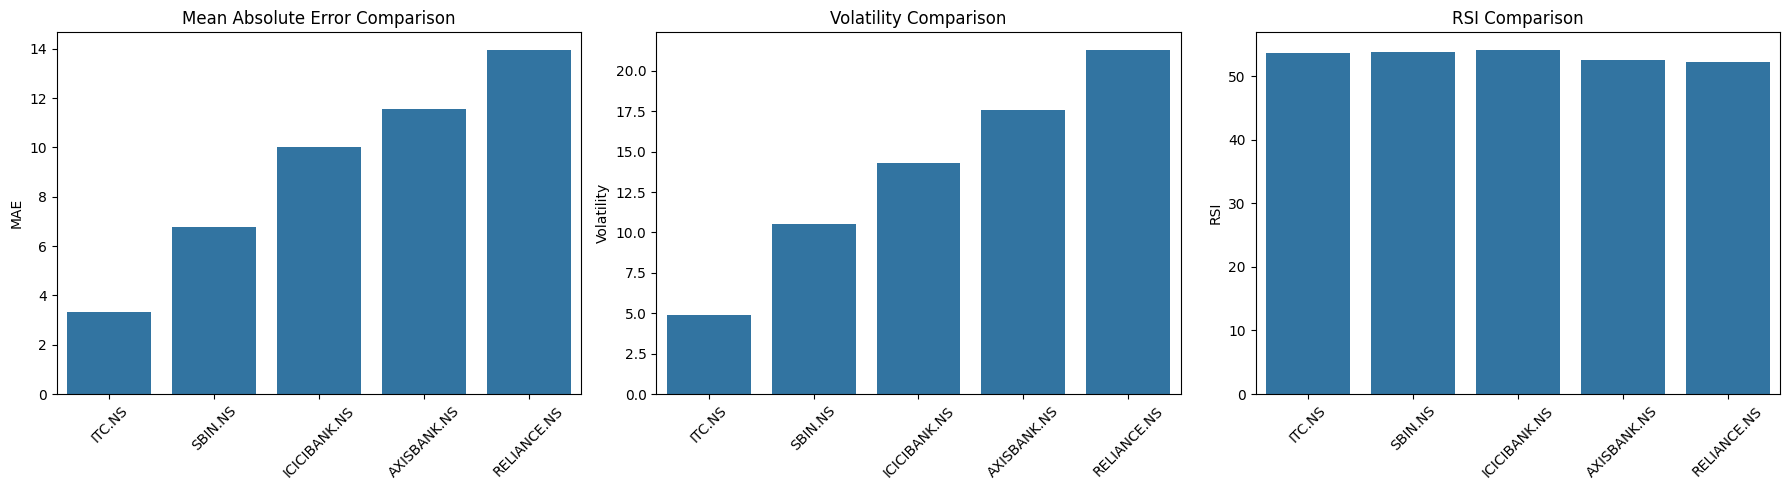

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Index Data for ^NSEI:
 Price              Close          High           Low          Open  Volume
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI
Date                                                                      
2020-01-01  12182.500000  12222.200195  12165.299805  12202.150391  304100
2020-01-02  12282.200195  12289.900391  12195.250000  12198.549805  407700
2020-01-03  12226.650391  12265.599609  12191.349609  12261.099609  428800
2020-01-06  11993.049805  12179.099609  11974.200195  12170.599609  396500
2020-01-07  12052.950195  12152.150391  12005.349609  12079.099609  447800
Index Data for ^BSESN:
 Price              Close          High           Low          Open Volume
Ticker            ^BSESN        ^BSESN        ^BSESN        ^BSESN ^BSESN
Date                                                                     
2020-01-02  41626.640625  41649.289062  41328.449219  41340.269531   5300
2020-01-03  41464.609375  41636.179688  41348.679688  416

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def compute_rsi(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# List of stocks to analyze
stocks = ["TCS.NS", "INFY.NS", "RELIANCE.NS", "ICICIBANK.NS",
          "SBIN.NS", "AXISBANK.NS", "BAJFINANCE.NS", "LT.NS", "MARUTI.NS", "ITC.NS"]

results = {}
stock_data = {}

for stock_symbol in stocks:
    # Fetch stock data
    stock = yf.download(stock_symbol, start="2020-01-01", end="2025-03-23")

    # Feature Engineering
    stock['Daily Return'] = stock['Close'].pct_change()
    stock['SMA_50'] = stock['Close'].rolling(window=50).mean()
    stock['EMA_200'] = stock['Close'].ewm(span=200, adjust=False).mean()
    stock['Volatility'] = stock['Close'].rolling(window=10).std()
    stock['RSI'] = compute_rsi(stock['Close'])

    # Drop NaN values
    stock.dropna(inplace=True)
    stock_data[stock_symbol] = stock

    # Define Features and Target
    features = ['Open', 'High', 'Low', 'SMA_50', 'EMA_200', 'Volatility', 'RSI', 'Daily Return']
    target = 'Close'

    X = stock[features]
    y = stock[target].shift(-1)

    # Drop last row due to shift operation
    X = X[:-1]
    y = y[:-1]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    avg_volatility = stock['Volatility'].mean()
    avg_rsi = stock['RSI'].mean()

    results[stock_symbol] = {
        'MAE': mae,
        'Avg Volatility': avg_volatility,
        'Avg RSI': avg_rsi
    }

    print(f"Stock: {stock_symbol}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Average Volatility: {avg_volatility:.2f}")
    print(f"Average RSI: {avg_rsi:.2f}\n")

# Identify the best 5 stocks based on MAE, Volatility, and RSI
sorted_stocks = sorted(results.items(), key=lambda x: (x[1]['MAE'], x[1]['Avg Volatility'], -x[1]['Avg RSI']))[:5]
best_stocks = [s[0] for s in sorted_stocks]

print("Top 5 Stocks for Further Analysis:")
for stock, metrics in sorted_stocks:
    print(f"{stock} - MAE: {metrics['MAE']:.2f}, Volatility: {metrics['Avg Volatility']:.2f}, RSI: {metrics['Avg RSI']:.2f}")

# Conclusion
print("\nConclusion:")
print("The 5 best-performing stocks were selected based on MAE (predictive accuracy), Volatility (stability), and RSI (momentum indicator).")
print("These stocks have shown relatively stable performance during market crashes and align well with major indices for portfolio analysis.")

# Plot comparison of the top 5 stocks
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot MAE comparison
sns.barplot(x=[s[0] for s in sorted_stocks], y=[s[1]['MAE'] for s in sorted_stocks], ax=axes[0])
axes[0].set_title("Mean Absolute Error Comparison")
axes[0].set_ylabel("MAE")
axes[0].set_xticklabels([s[0] for s in sorted_stocks], rotation=45)

# Plot Volatility comparison
sns.barplot(x=[s[0] for s in sorted_stocks], y=[s[1]['Avg Volatility'] for s in sorted_stocks], ax=axes[1])
axes[1].set_title("Volatility Comparison")
axes[1].set_ylabel("Volatility")
axes[1].set_xticklabels([s[0] for s in sorted_stocks], rotation=45)

# Plot RSI comparison
sns.barplot(x=[s[0] for s in sorted_stocks], y=[s[1]['Avg RSI'] for s in sorted_stocks], ax=axes[2])
axes[2].set_title("RSI Comparison")
axes[2].set_ylabel("RSI")
axes[2].set_xticklabels([s[0] for s in sorted_stocks], rotation=45)

plt.tight_layout()
plt.show()

# Compare portfolio behavior during major market crashes
indices = ["^NSEI", "^BSESN", "^DJI"]
index_data = {}

for index in indices:
    index_data[index] = yf.download(index, start="2020-01-01", end="2025-03-23")
    print(f"Index Data for {index}:\n", index_data[index].head())